In [2]:
import numpy as np
def b_dense(x_inp,w,b,activation):
    x_inp=np.array(x_inp).reshape(1,-1)
    w=np.array(w).T
    b=np.array(b).reshape(1,-1)
    Z=np.matmul(x_inp,w)+b

    return activation(Z),Z

In [3]:
import math
def b_sigmoid(x_inp,diff=False):
    def singleSigmoid(z1):
        try:
            return (1/(1+math.exp(-z1)))
        except:
            print(z1)
    def derivative(z1):
        temp1=singleSigmoid(z1)
        return (temp1*(1-temp1))
    if diff:
        return np.vectorize(derivative)(x_inp)
    else:
        return np.vectorize(singleSigmoid)(x_inp) #https://stackoverflow.com/a/62865571
def b_linear(x_inp,diff=False):
    if diff:
        return np.vectorize((lambda a:1))(x_inp)
    else:
        return x_inp
def b_threshold(x_inp):
    return np.vectorize((lambda a:1 if a>0 else 0))(x_inp)
def b_relu(x_inp,diff=False):
    if diff:
        return np.vectorize((lambda a:1 if a>0 else 0.01))(x_inp)
    else:
        return np.vectorize((lambda a:a if a>0 else 0.01*a))(x_inp)

In [4]:
def b_sequential(x_inp,Weights,Biases,Activation):
    f_x=x_inp
    Zs=[]
    for i in range(len(Activation)):
        f_x,z_x=(b_dense)(f_x,Weights[i],Biases[i],Activation[i])
        #print(f'Layer {i+1}: {f_x}')
        Zs.append(z_x)
    return f_x,Zs

In [5]:
np.array([1,2,3]).reshape(1,-1)

array([[1, 2, 3]])

In [6]:
def XOR(x_inp):
    output,layers=b_sequential(x_inp,[[[1,1],[-1,-1]],[[1,1]]],[[-0.5,1.5],[-1.5]],[b_threshold for i in range(2)])
    return output,layers

In [7]:
output0,layers0=XOR([1,0])
print(layers0)
print(output0)

[array([[0.5, 0.5]]), array([[0.5]])]
[[1]]


In [8]:
def Vid(x_inp):
    output=b_sequential(x_inp,[[[0.15,0.2],[0.25,0.3]],[[0.4,0.45],[0.5,0.55]]],[[0.35,0.35],[0.6,0.6]],[b_sigmoid for i in range(2)])
    return output
o1,k1=(Vid([[0.05,0.1]]))
print(o1)

[[0.75136507 0.77292847]]


In [9]:
def b_error(output,target):
    return 0.5*sum([(target[i]-output[i])**2 for i in range(len(target))])

In [10]:
def updateVal(a,b,step):
    return [list(ai + step * bi for ai, bi in zip(sub_a, sub_b)) for sub_a, sub_b in zip(a, b)]

In [11]:
def b_backprop(x_inps,Weights,Biases,Activation,Targets,setLdAlNum):
    changeB=[np.zeros(len(Biases[b00])) for b00 in range(len(Biases))]
    changeW=[np.array(w00)*0 for w00 in Weights]
    lambda_,alpha_,numIterations=setLdAlNum
    cost=0

    BiasesOutput=[np.array(b00) for b00 in Biases]
    WeightsOutput=[np.array(w00) for w00 in Weights]

    TrainSize=len(Targets)
    for gradientDescent in range(numIterations):
        
        cost=0
        delCdelB=[np.zeros(len(Biases[b00])) for b00 in range(len(Biases))]
        delCdelW=[np.array(w00)*0 for w00 in Weights]
        for i in range(TrainSize):
            Weights=WeightsOutput
            Biases=BiasesOutput

            outputi,layersi=b_sequential(x_inps[i],Weights,Biases,Activation)
            cost+= b_error(outputi[0],Targets[i])
            delCdelzcurr=[((outputi[0]-Targets[i])*Activation[-1](layersi[-1][0],diff=True))]
            for ll in range(len(Biases)-1,0,-1):
                nextLayers=np.array(delCdelzcurr[0])
                outWeights=np.array(Weights[ll])
                delCdelzcurr.insert(0,np.matmul(nextLayers,outWeights)*Activation[ll](layersi[ll-1][0],diff=True))
            #print(delCdelzcurr)

            delCdelwcurr=[]
            for j in range(len(Weights)):
                if j==0:
                    delCdelwcurr.append(np.matmul(np.array([delCdelzcurr[j]]).T,np.array([x_inps[i]])))
                else:
                    delCdelwcurr.append(np.matmul(np.array([delCdelzcurr[j]]).T,np.array([Activation[j-1](layersi[j-1][0],diff=True)])))

            #print(delCdelwcurr)

            delCdelB=[delCdelB[b00]+delCdelzcurr[b00] for b00 in range(len(Biases))]
            delCdelW=[delCdelW[w00]+delCdelwcurr[w00] for w00 in range(len(Weights))]
            #
        cost=cost/TrainSize
        print(f"Cost at #{gradientDescent}: {cost}\r",end='')
        if gradientDescent%1000==0:
            print(f"Cost at #{gradientDescent}: {cost}")


        BiasesOutput=[BiasesOutput[b00]-(lambda_/TrainSize)*delCdelB[b00]+(alpha_)*changeB[b00] for b00 in range(len(Biases))]
        WeightsOutput=[WeightsOutput[b00]-(lambda_/TrainSize)*delCdelW[b00]+(alpha_)*changeW[b00] for b00 in range(len(Biases))]
        #https://youtu.be/iudXf5n_3ro
        changeB=[-(lambda_/TrainSize)*delCdelB[b00]+(alpha_)*changeB[b00] for b00 in range(len(Biases))]
        changeW=[-(lambda_/TrainSize)*delCdelW[b00]+(alpha_)*changeW[b00] for b00 in range(len(Biases))]


    print(f"Cost at #{numIterations}: {cost}")
    return WeightsOutput,BiasesOutput
            





print(b_backprop([[0.05,0.1]],[[[0.15,0.2],[0.25,0.3]],[[0.4,0.45],[0.5,0.55]]],[[0.35,0.35],[0.6,0.6]],[b_sigmoid for i in range(2)],[[0.01, 0.99]],(0.5,0.9,7000)))

Cost at #0: 0.2983711087600027
Cost at #1000: 2.0254878410674998e-05
Cost at #2000: 1.303401740146918e-055
Cost at #3000: 8.556149642287105e-065
Cost at #4000: 4.959091133189774e-066
Cost at #5000: 2.431847837573228e-066
Cost at #6000: 1.0029589201149795e-06
Cost at #7000: 3.571911381942394e-077
([array([[0.15101984, 0.20203968],
       [0.24992326, 0.29984652]]), array([[-0.69193635, -0.6393511 ],
       [ 1.13089895,  1.18137643]])], [array([0.37039675, 0.34846523]), array([-3.88816526,  3.20318898])])


In [12]:
a=([[1],[2,3]])
updateVal(0*a,a,1)

[]

In [13]:
abc=np.array([[1,2],[3,4],[5,6]])*0
abc

array([[0, 0],
       [0, 0],
       [0, 0]])

In [14]:
import random
def b_weightsbiasesrandom(layerinfo):
    brandom=[[random.uniform(-1, 1) for _ in range(num0)] for num0 in layerinfo[1:]]
    wrandom=[np.array([random.uniform(-1, 1) for _ in range(layerinfo[i]*layerinfo[i+1])]).reshape(layerinfo[i+1],layerinfo[i]) for i in range(len(layerinfo)-1)]
    return wrandom,brandom

In [35]:
xorw,xorb=b_weightsbiasesrandom((2,2,1))
xoractivation=[b_relu,b_sigmoid]
xorw,xorb=b_backprop([[0,0],[0,1],[1,0],[1,1]],xorw,xorb,xoractivation,[[0],[1],[1],[0]],(0.01,0.05,30000))

Cost at #0: 0.15145803977753974
Cost at #1000: 0.12862714034737827
Cost at #2000: 0.12853700999166195
Cost at #3000: 0.13131219550012854
Cost at #4000: 0.13321338424294274
Cost at #5000: 0.13336098109870262
Cost at #6000: 0.13118294647697637
Cost at #7000: 0.12590332905497842
Cost at #8000: 0.11629879976873098
Cost at #9000: 0.10225977258582361
Cost at #10000: 0.08811925322072556
Cost at #11000: 0.08048486386404002
Cost at #12000: 0.07586419491074733
Cost at #13000: 0.07257533835414354
Cost at #14000: 0.06992548813175231
Cost at #15000: 0.06755244517172491
Cost at #16000: 0.06526880468921889
Cost at #17000: 0.06298972884606432
Cost at #18000: 0.060688276571714875
Cost at #19000: 0.058367058833339736
Cost at #20000: 0.056041187750471046
Cost at #21000: 0.053728936580046086
Cost at #22000: 0.051447299867484746
Cost at #23000: 0.048904750723986994
Cost at #24000: 0.044015865794573644
Cost at #25000: 0.040545965896328175
Cost at #26000: 0.038049768205540103
Cost at #27000: 0.03605138795503

In [36]:
for inp in [[0,0],[0,1],[1,0],[1,1]]:
    out00,layer00=b_sequential(inp,xorw,xorb,xoractivation)
    print(out00)

[[0.22643772]]
[[0.7846937]]
[[0.69596901]]
[[0.24317014]]


In [17]:
lineareg_w,lineareg_b=b_weightsbiasesrandom((1,1))

linear_activation=[b_linear]
lineareg_inp=[[xinp] for xinp in [3.6,11.63,14,17.57,20.54,23,25.4,26.7]]
lineareg_expectedoutput=[[yinp] for yinp in [9.85,13.4,14,15.4,16.4,18,18.87,19.8]]
lineareg_w,lineareg_b=b_backprop(lineareg_inp,lineareg_w,lineareg_b,linear_activation,lineareg_expectedoutput,(0.0005,0,50000))


Cost at #0: 176.86227762935516
Cost at #1000: 5.003295992740267
Cost at #2000: 4.3390065028951415
Cost at #3000: 3.7634651351668938
Cost at #4000: 3.2648152678571895
Cost at #5000: 2.8327843069039463
Cost at #6000: 2.4584720620632944
Cost at #7000: 2.1341673957298846
Cost at #8000: 1.8531893672114736
Cost at #9000: 1.6097495999004277
Cost at #10000: 1.3988330359934653
Cost at #11000: 1.2160946222096451
Cost at #12000: 1.0577697981481522
Cost at #13000: 0.9205969432729031
Cost at #14000: 0.8017501848686711
Cost at #15000: 0.6987811827578861
Cost at #16000: 0.6095686914955692
Cost at #17000: 0.5322748609827178
Cost at #18000: 0.46530737525493165
Cost at #19000: 0.40728664947455184
Cost at #20000: 0.35701740935754675
Cost at #21000: 0.31346406754816997
Cost at #22000: 0.27572938967460325
Cost at #23000: 0.24303601058892707
Cost at #24000: 0.21471042001091496
Cost at #25000: 0.19016908766682095
Cost at #26000: 0.16890644208968558
Cost at #27000: 0.15048445543468348
Cost at #28000: 0.134523

In [18]:
print(lineareg_w,lineareg_b)

[array([[0.43062433]])] [array([8.01219617])]


In [19]:
from tensorflow.keras import datasets
#https://www.kaggle.com/code/abdelrahmanramadan2/mnist?scriptVersionId=152380489&cellId=2
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


In [20]:
len(x_train)

60000

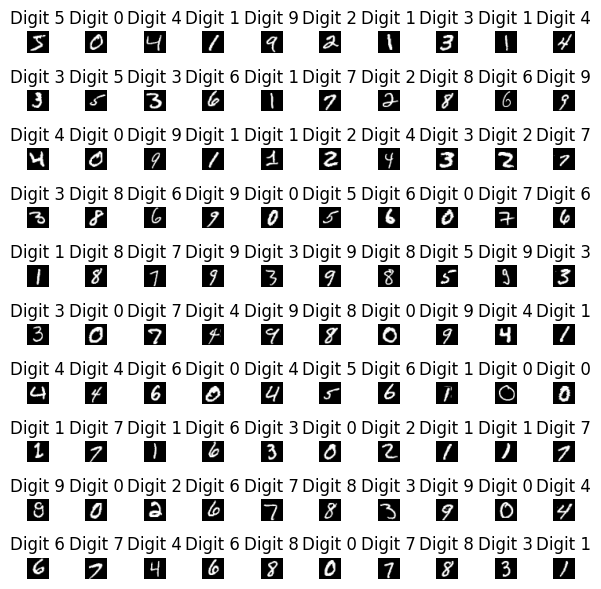

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(100):
  plt.subplot(10,10, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title('Digit {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [22]:
def flatten2d(thelist):
    return ([xyz/255 for yzx in thelist for xyz in yzx])

In [51]:
(x_train[1]).shape
28**2

digit01=[i for i in range(0,60000) if y_train[i]==0 or y_train[i]==1]
x_train01=x_train[digit01]
y_train01=y_train[digit01]
y_train01

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [52]:
digit_w,digit_b=b_weightsbiasesrandom((784,800,1))

digit_activation=[b_relu,b_sigmoid]
digit_inp=[flatten2d(x_train01[i]) for i in range(100)]
#digit_expectedoutput=[[int(yinp==r10) for r10 in range(10)] for yinp in y_train01[:100]]
digit_expectedoutput=[[yinp] for yinp in y_train01[:100]]
digit_w,digit_b=b_backprop(digit_inp,digit_w,digit_b,digit_activation,digit_expectedoutput,(0.00005,0,100))

Cost at #0: 0.22601915573661713
Cost at #100: 0.2259498259036038


In [ ]:
for k01 in range(100):
    digit_inp=[flatten2d(x_train01[i]) for i in range(100*k01,100+100*k01)]
    digit_expectedoutput=[[yinp] for yinp in y_train01[:100]]
    digit_w,digit_b=b_backprop(digit_inp,digit_w,digit_b,digit_activation,digit_expectedoutput,(0.005,0,100))

In [58]:
digout,diglayer=b_sequential(flatten2d(x_train01[5]),digit_w,digit_b,digit_activation)
print(diglayer[1])
print(y_train01[5])
print(digit_w)

[[132.52452438]]
0
[array([[-0.67082781,  0.93462591,  0.95419774, ..., -0.66915081,
        -0.09683491,  0.8668029 ],
       [ 0.83127791, -0.84910539,  0.88732978, ..., -0.70956392,
        -0.01441394,  0.90463695],
       [-0.47951885,  0.62171697,  0.22550166, ..., -0.65194848,
         0.06125151,  0.050418  ],
       ...,
       [-0.61920903,  0.54814818,  0.19574696, ...,  0.13252281,
         0.68583668, -0.87462425],
       [-0.23947153, -0.39167674,  0.90604698, ..., -0.51666283,
         0.50954737,  0.96857956],
       [ 0.81730254, -0.63532028,  0.59225843, ..., -0.50944317,
        -0.97953498,  0.66447297]]), array([[-5.45030294e-01,  2.90664953e-01,  3.02407258e-01,
        -8.81860861e-01,  2.20880338e-01, -8.56300140e-01,
        -5.39143617e-01,  2.64430820e-01, -8.66811273e-01,
         6.94510356e-01, -9.91893830e-01,  2.53586356e-02,
        -3.89596019e-01, -8.33694711e-01, -4.84249751e-01,
        -3.37794748e-01, -7.72108899e-01, -5.83266112e-01,
        -8.1

In [125]:
flatten2d(x_train[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011764705882352941,
 0.07058823529411765,
 0.07058823529411765,
 0.07058823529411765,